## Step 1: Load and Explore the Data

First, load the data into a DataFrame to examine its structure and contents.

In [1]:
import pandas as pd
import requests
# Load the dataset
file_path = 'OI_Data.txt'
# Read the text file
df = pd.read_csv(file_path, delimiter='\t')  # Assuming the text file is tab-delimited

# Save the data to a CSV file
csv_file_path = 'converted_data.csv'
df.to_csv(csv_file_path, index=False)

# Display the first few rows of the dataframe
print(df.head())


                                          Name  Gene(s)       Protein change  \
0  NM_080605.4(B3GALT6):c.556T>C (p.Phe186Leu)  B3GALT6                F186L   
1      NM_000478.6(ALPL):c.227A>G (p.Gln76Arg)     ALPL           Q76R, Q21R   
2     NM_000478.6(ALPL):c.407G>A (p.Arg136His)     ALPL    R136H, R59H, R81H   
3     NM_000478.6(ALPL):c.526G>A (p.Ala176Thr)     ALPL   A176T, A121T, A99T   
4     NM_000478.6(ALPL):c.550C>T (p.Arg184Trp)     ALPL  R184W, R107W, R129W   

                                        Condition(s)     Accession  \
0  not provided|Spondyloepimetaphyseal dysplasia ...  VCV000522415   
1               not provided|Osteogenesis imperfecta  VCV000381585   
2  Adult hypophosphatasia|not provided|Childhood ...  VCV000013675   
3  Infantile hypophosphatasia|not provided|Childh...  VCV000013683   
4  Infantile hypophosphatasia|Adult hypophosphata...  VCV000521379   

  GRCh37Chromosome GRCh37Location GRCh38Chromosome GRCh38Location  \
0                1        116

In [2]:
# Display column names to verify
print(df.columns)

# Check for any missing values
print(df.isnull().sum())

# Display summary statistics
print(df.describe())


Index(['Name', 'Gene(s)', 'Protein change', 'Condition(s)', 'Accession',
       'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome',
       'GRCh38Location', 'VariationID', 'AlleleID(s)', 'dbSNP ID',
       'Canonical SPDI', 'Variant type', 'Molecular consequence',
       'Germline classification', 'Germline date last evaluated',
       'Germline review status', 'Somatic clinical impact',
       'Somatic clinical impact date last evaluated',
       'Somatic clinical impact review status', 'Oncogenicity classification',
       'Oncogenicity date last evaluated', 'Oncogenicity review status',
       'Unnamed: 24'],
      dtype='object')
Name                                              0
Gene(s)                                           3
Protein change                                  496
Condition(s)                                      0
Accession                                         0
GRCh37Chromosome                                 11
GRCh37Location                          

In [3]:
# Display basic information and the first few rows
print(df.info())
print(df.head())

# Drop irrelevant columns
columns_to_drop = [
    'Somatic clinical impact', 'Somatic clinical impact date last evaluated',
    'Somatic clinical impact review status', 'Oncogenicity classification',
    'Oncogenicity date last evaluated', 'Oncogenicity review status',
    'Unnamed: 24'
]
df.drop(columns=columns_to_drop, inplace=True)

# Clean the 'GRCh37Location' and 'GRCh38Location' columns to ensure they contain only integers
def extract_start_location(location):
    if pd.isna(location):
        return location
    if isinstance(location, str) and '-' in location:
        return int(location.split(' - ')[0])
    return int(location)

df['GRCh37Location'] = df['GRCh37Location'].apply(extract_start_location)
df['GRCh38Location'] = df['GRCh38Location'].apply(extract_start_location)

# Drop rows with missing values in essential columns
df.dropna(subset=['Gene(s)', 'Protein change', 'GRCh37Chromosome', 'GRCh37Location', 
                  'GRCh38Chromosome', 'GRCh38Location', 'Molecular consequence'], inplace=True)

# Fill missing values in less critical columns with a placeholder
df['dbSNP ID'].fillna('N/A', inplace=True)
df['Canonical SPDI'].fillna('N/A', inplace=True)

# Convert data types
df['GRCh37Chromosome'] = df['GRCh37Chromosome'].astype(str)
df['GRCh38Chromosome'] = df['GRCh38Chromosome'].astype(str)
df['GRCh37Location'] = df['GRCh37Location'].astype(int)
df['GRCh38Location'] = df['GRCh38Location'].astype(int)
df['VariationID'] = df['VariationID'].astype(int)
df['AlleleID(s)'] = df['AlleleID(s)'].astype(str)

# Filter by relevant molecular consequences
relevant_consequences = ['missense variant', 'nonsense variant', 'frameshift variant', 'splice site variant']
df = df[df['Molecular consequence'].isin(relevant_consequences)]

# Filter by pathogenic classifications
relevant_classifications = ['Pathogenic', 'Likely pathogenic']
df = df[df['Germline classification'].isin(relevant_classifications)]

# Remove duplicate rows
df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Name                                         2034 non-null   object 
 1   Gene(s)                                      2031 non-null   object 
 2   Protein change                               1538 non-null   object 
 3   Condition(s)                                 2034 non-null   object 
 4   Accession                                    2034 non-null   object 
 5   GRCh37Chromosome                             2023 non-null   object 
 6   GRCh37Location                               2023 non-null   object 
 7   GRCh38Chromosome                             1979 non-null   object 
 8   GRCh38Location                               1979 non-null   object 
 9   VariationID                                  2034 non-null   int64  
 10  

In [4]:

# Save the cleaned data to a new CSV file
cleaned_file_path = 'cleaned_data.csv'
df.to_csv(cleaned_file_path, index=False)

print("Data cleaning complete. Cleaned data saved to:", cleaned_file_path)



Data cleaning complete. Cleaned data saved to: cleaned_data.csv


In [5]:

# Filtering Data: Focus on relevant conditions, molecular consequences, and pathogenic classifications
relevant_conditions = ['Osteogenesis imperfecta', 'Spondyloepimetaphyseal dysplasia', 'Hypophosphatasia']
relevant_consequences = ['missense variant', 'nonsense variant', 'frameshift variant', 'splice site variant']
relevant_classifications = ['Pathogenic', 'Likely pathogenic']

filtered_df = df[
    (df['Condition(s)'].apply(lambda x: any(cond in x for cond in relevant_conditions))) &
    (df['Molecular consequence'].isin(relevant_consequences)) &
    (df['Germline classification'].isin(relevant_classifications))
]

# Save the filtered data to a new CSV file
filtered_file_path = 'filtered_data.csv'
filtered_df.to_csv(filtered_file_path, index=False)

print("Filtered data saved to:", filtered_file_path)

# Further Analysis: Example analysis of genetic mutations and potential therapeutic targets
# Group by Gene and count the occurrences of each mutation
mutation_counts = filtered_df.groupby('Gene(s)')['VariationID'].count().reset_index()
mutation_counts.columns = ['Gene(s)', 'Mutation Count']
mutation_counts.sort_values(by='Mutation Count', ascending=False, inplace=True)

# Save mutation counts to a CSV file
mutation_counts_file_path = 'mutation_counts.csv'
mutation_counts.to_csv(mutation_counts_file_path, index=False)

print("Mutation counts saved to:", mutation_counts_file_path)

# Analyze pathways involved (example: further analysis can be added based on available data and tools)
# For this example, let's assume we want to list the unique genes involved, ordered by frequency
unique_genes_ordered = mutation_counts['Gene(s)'].tolist()

# Save unique genes to a text file
unique_genes_file_path = 'unique_genes.txt'
with open(unique_genes_file_path, 'w') as f:
    for gene in unique_genes_ordered:
        f.write(gene + '\n')

print("Unique genes saved to:", unique_genes_file_path)


Filtered data saved to: filtered_data.csv
Mutation counts saved to: mutation_counts.csv
Unique genes saved to: unique_genes.txt


In [6]:
!pip install gprofiler-official


In [7]:
import pandas as pd
from gprofiler import GProfiler

# Pathway analysis using g:Profiler
def pathway_analysis(genes):
    gp = GProfiler(return_dataframe=True)
    pathways = gp.profile(organism='hsapiens', query=genes)
    return pathways

# Assuming 'unique_genes_ordered' is a list of genes
pathways = pathway_analysis(unique_genes_ordered)

print("Pathways:")
print(pathways)


Pathways:
    source              native  \
0       WP           WP:WP4786   
1       HP          HP:0000703   
2       HP          HP:0010299   
3       HP          HP:0002757   
4       HP          HP:0002659   
..     ...                 ...   
131     HP          HP:0031095   
132  GO:BP          GO:0001568   
133   REAC  REAC:R-HSA-3000178   
134  GO:BP          GO:0010033   
135  GO:BP          GO:0043434   

                                                  name       p_value  \
0    Type I collagen synthesis in the context of os...  1.222830e-24   
1                            Dentinogenesis imperfecta  3.436364e-23   
2                           Abnormal dentin morphology  2.754218e-22   
3                                  Recurrent fractures  8.439247e-19   
4                Increased susceptibility to fractures  3.834595e-17   
..                                                 ...           ...   
131                        Abnormal humerus morphology  3.483846e-02   
132  

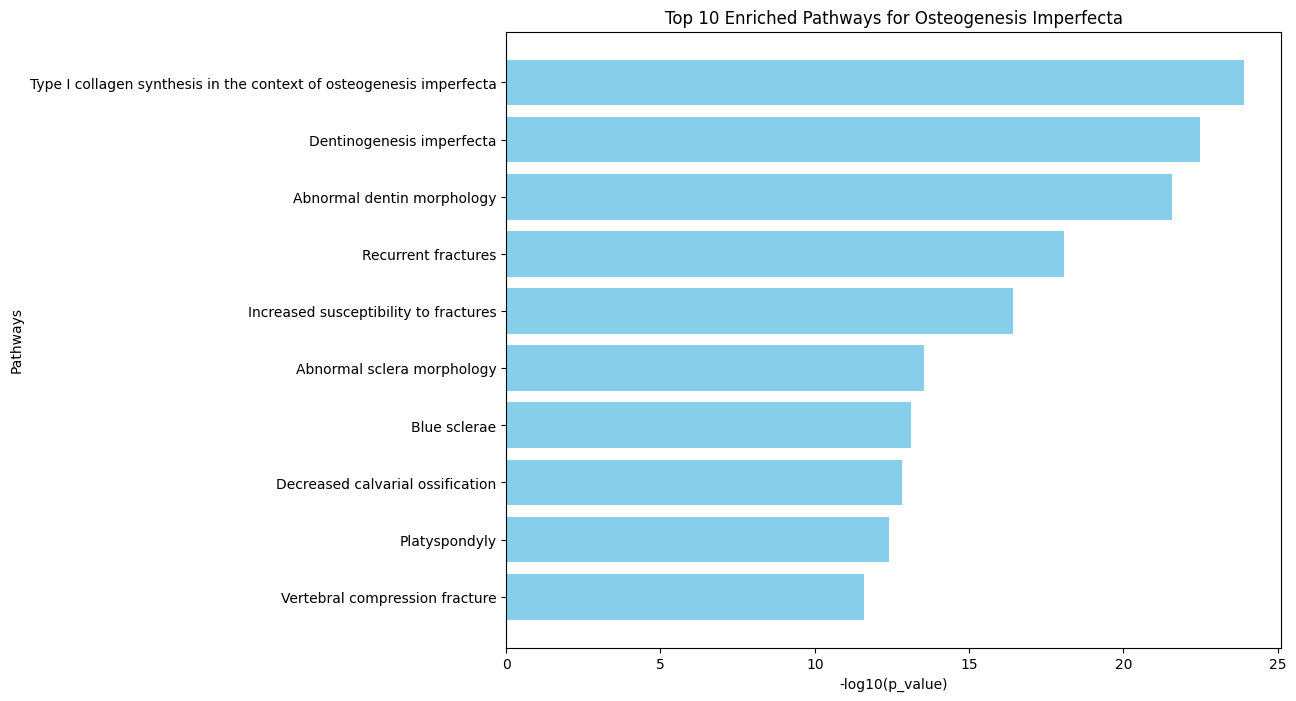

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# Convert p-values to -log10(p-value) for better visualization
pathways['-log10(p_value)'] = -np.log10(pathways['p_value'])

# Plot the top 10 significant pathways
top_pathways = pathways.nlargest(10, '-log10(p_value)')

plt.figure(figsize=(10, 8))
plt.barh(top_pathways['name'], top_pathways['-log10(p_value)'], color='skyblue')
plt.xlabel('-log10(p_value)')
plt.ylabel('Pathways')
plt.title('Top 10 Enriched Pathways for Osteogenesis Imperfecta')
plt.gca().invert_yaxis()  # Highest values at the top
plt.show()


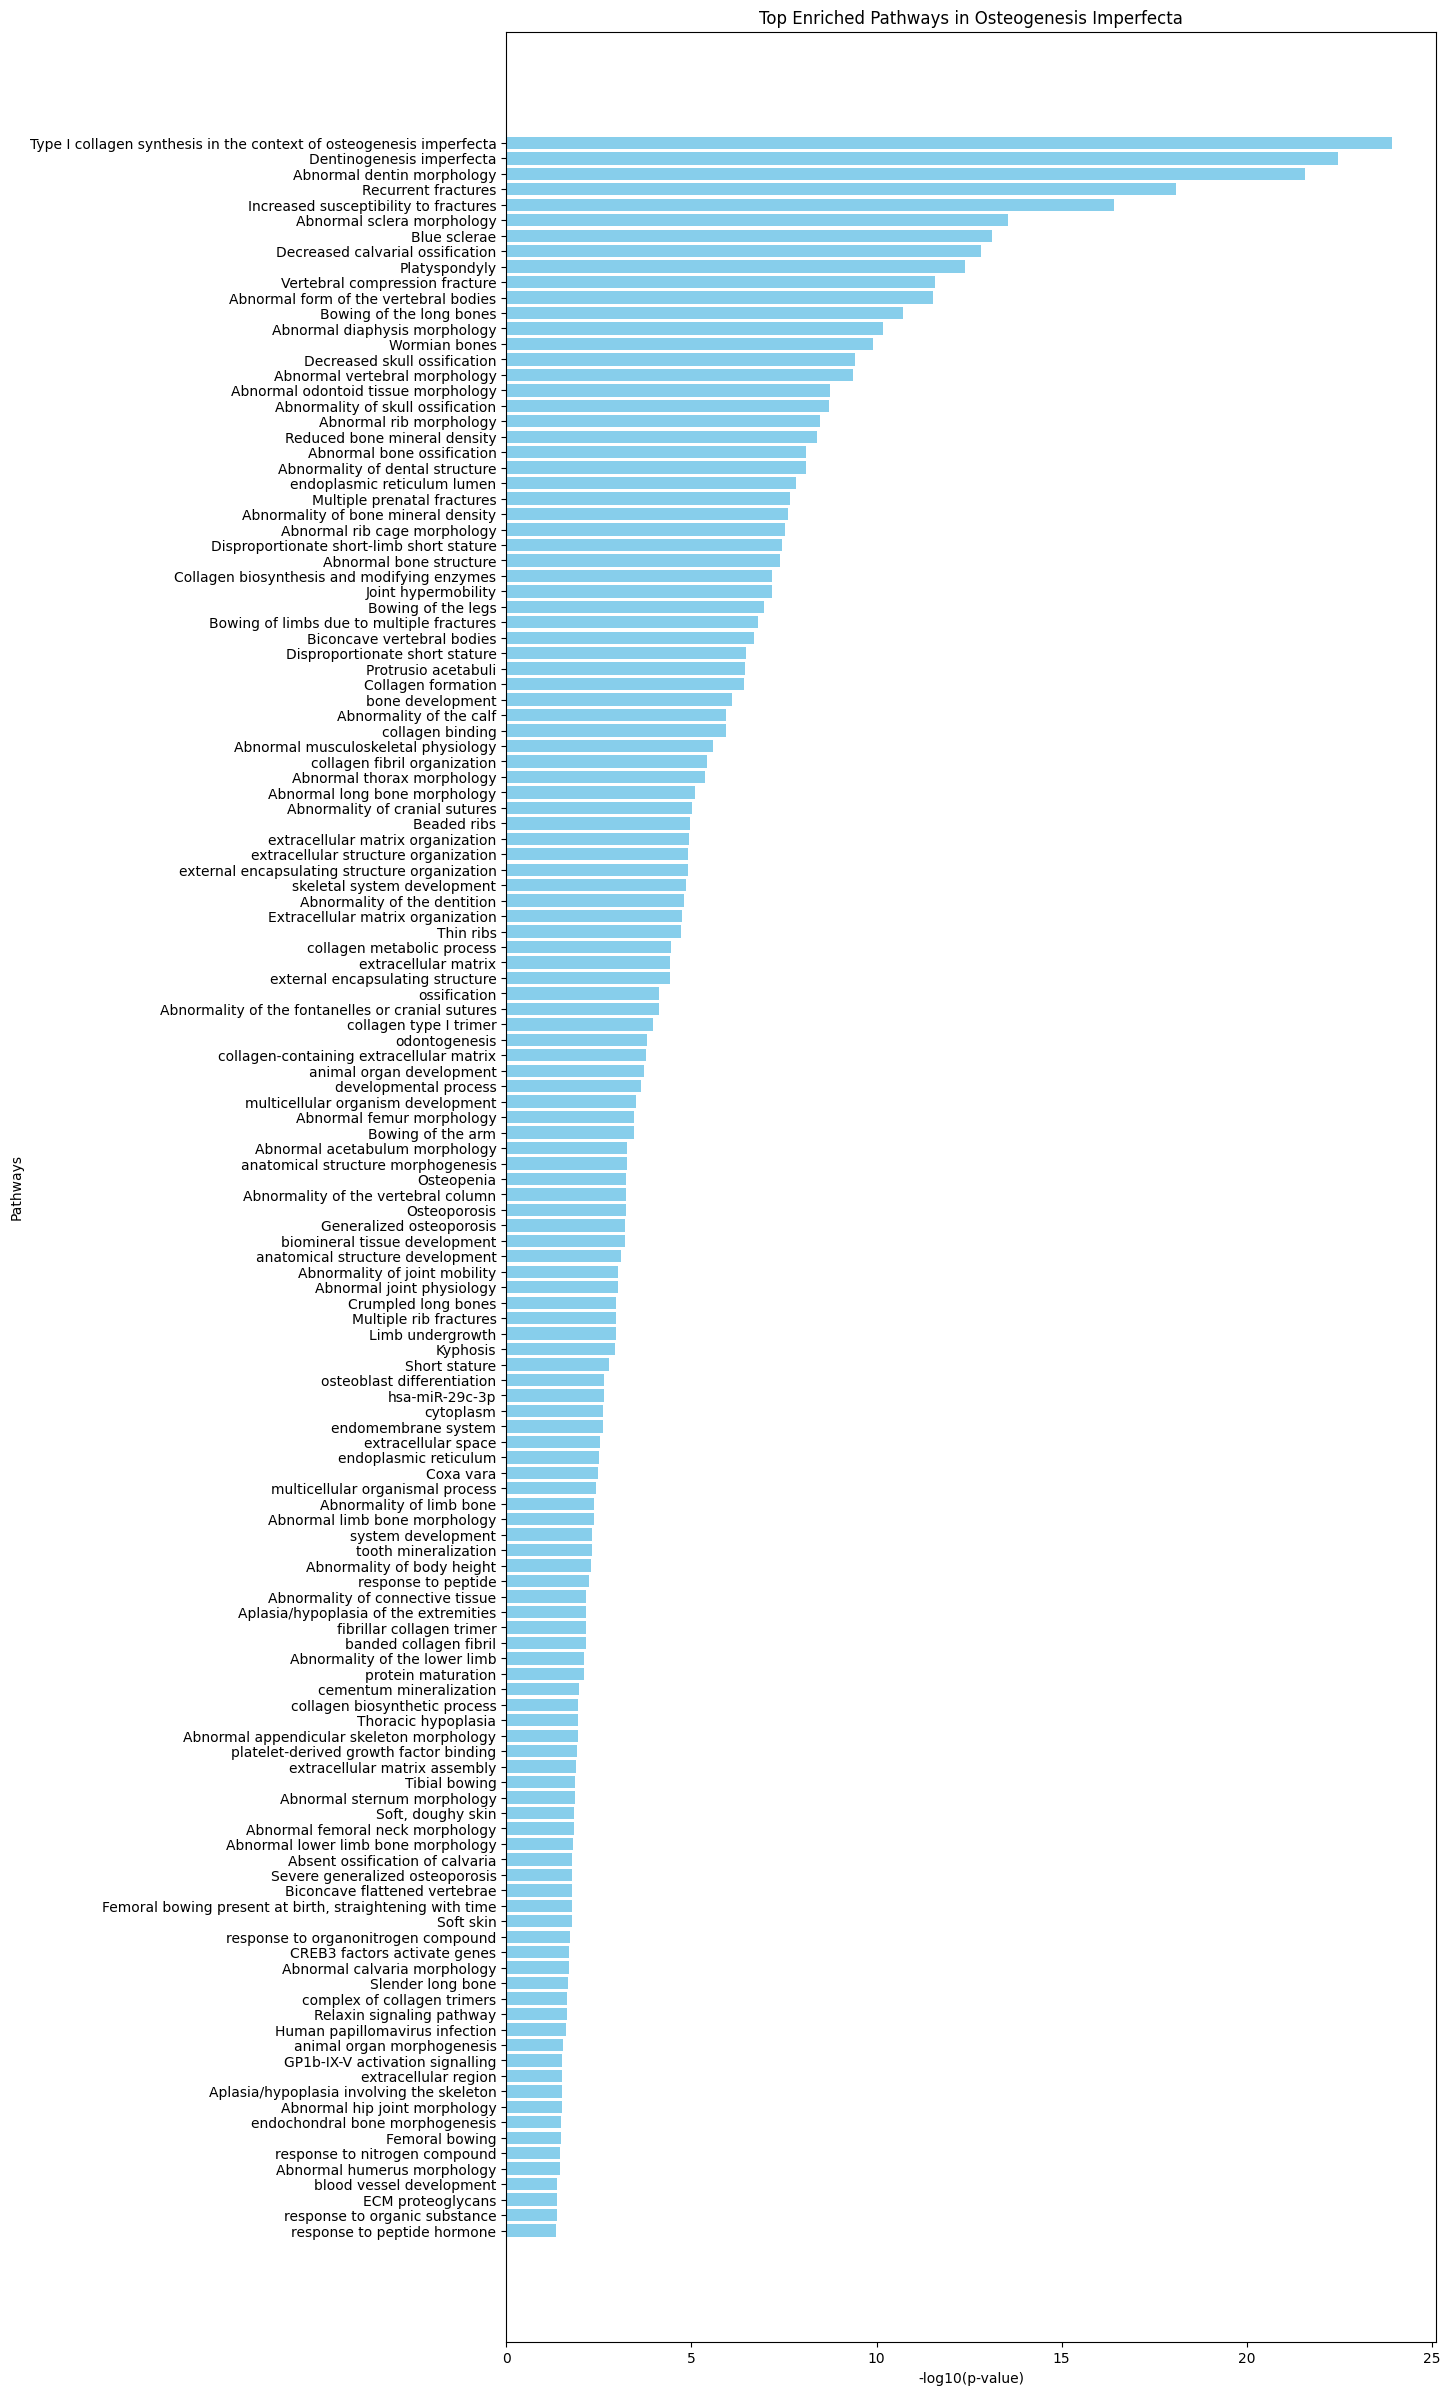

In [9]:
plt.figure(figsize=(12, 30))
plt.barh(pathways['name'], -np.log10(pathways['p_value']), color='skyblue')
plt.xlabel('-log10(p-value)')
plt.ylabel('Pathways')
plt.title('Top Enriched Pathways in Osteogenesis Imperfecta')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()


In [10]:
from gprofiler import GProfiler

# Pathway analysis using g:Profiler
def pathway_analysis(genes):
    gp = GProfiler(return_dataframe=True)
    pathways = gp.profile(organism='hsapiens', query=genes)
    return pathways

# Assuming 'unique_genes_ordered' is a list of unique genes involved, ordered by frequency
unique_genes_ordered = df['Gene(s)'].unique().tolist()

# Perform pathway analysis
pathways = pathway_analysis(unique_genes_ordered)

# Display the pathways dataframe
print(pathways)


    source      native                                               name  \
0       WP   WP:WP4786  Type I collagen synthesis in the context of os...   
1       HP  HP:0000703                          Dentinogenesis imperfecta   
2       HP  HP:0010299                         Abnormal dentin morphology   
3       HP  HP:0002757                                Recurrent fractures   
4       HP  HP:0002659              Increased susceptibility to fractures   
..     ...         ...                                                ...   
155     HP  HP:0005005  Femoral bowing present at birth, straightening...   
156  GO:BP  GO:0097187                                     dentinogenesis   
157  GO:MF  GO:0031543              peptidyl-proline dioxygenase activity   
158  GO:BP  GO:0030282                                bone mineralization   
159  CORUM   CORUM:472               Prolyl 4-hydroxylase (alpha(I)-type)   

          p_value  significant  \
0    8.818733e-32         True   
1    1.

In [11]:
# Extract relationships from pathways dataframe
relationships = {}
for index, row in pathways.iterrows():
    pathway_name = row['name']
    parent_pathways = row['parents']
    relationships[pathway_name] = parent_pathways

# Print the relationships
for pathway_name, parent_pathways in relationships.items():
    print(f"Pathway: {pathway_name}")
    print(f"Parents: {', '.join(parent_pathways)}")
    print()


Pathway: Type I collagen synthesis in the context of osteogenesis imperfecta
Parents: WP:000000

Pathway: Dentinogenesis imperfecta
Parents: HP:0010299, HP:3000050

Pathway: Abnormal dentin morphology
Parents: HP:0011061

Pathway: Recurrent fractures
Parents: HP:0002659

Pathway: Increased susceptibility to fractures
Parents: HP:0011843

Pathway: Wormian bones
Parents: HP:0011329

Pathway: Blue sclerae
Parents: HP:0000591

Pathway: Abnormal sclera morphology
Parents: HP:0012372

Pathway: Platyspondyly
Parents: HP:0003312

Pathway: Abnormal form of the vertebral bodies
Parents: HP:0003468

Pathway: Collagen biosynthesis and modifying enzymes
Parents: REAC:R-HSA-1474290

Pathway: Bowing of the long bones
Parents: HP:0000940

Pathway: Vertebral compression fracture
Parents: HP:0003468

Pathway: Abnormal diaphysis morphology
Parents: HP:0002813, HP:0011314

Pathway: Collagen formation
Parents: REAC:R-HSA-1474244

Pathway: Reduced bone mineral density
Parents: HP:0004348

Pathway: Abnormali

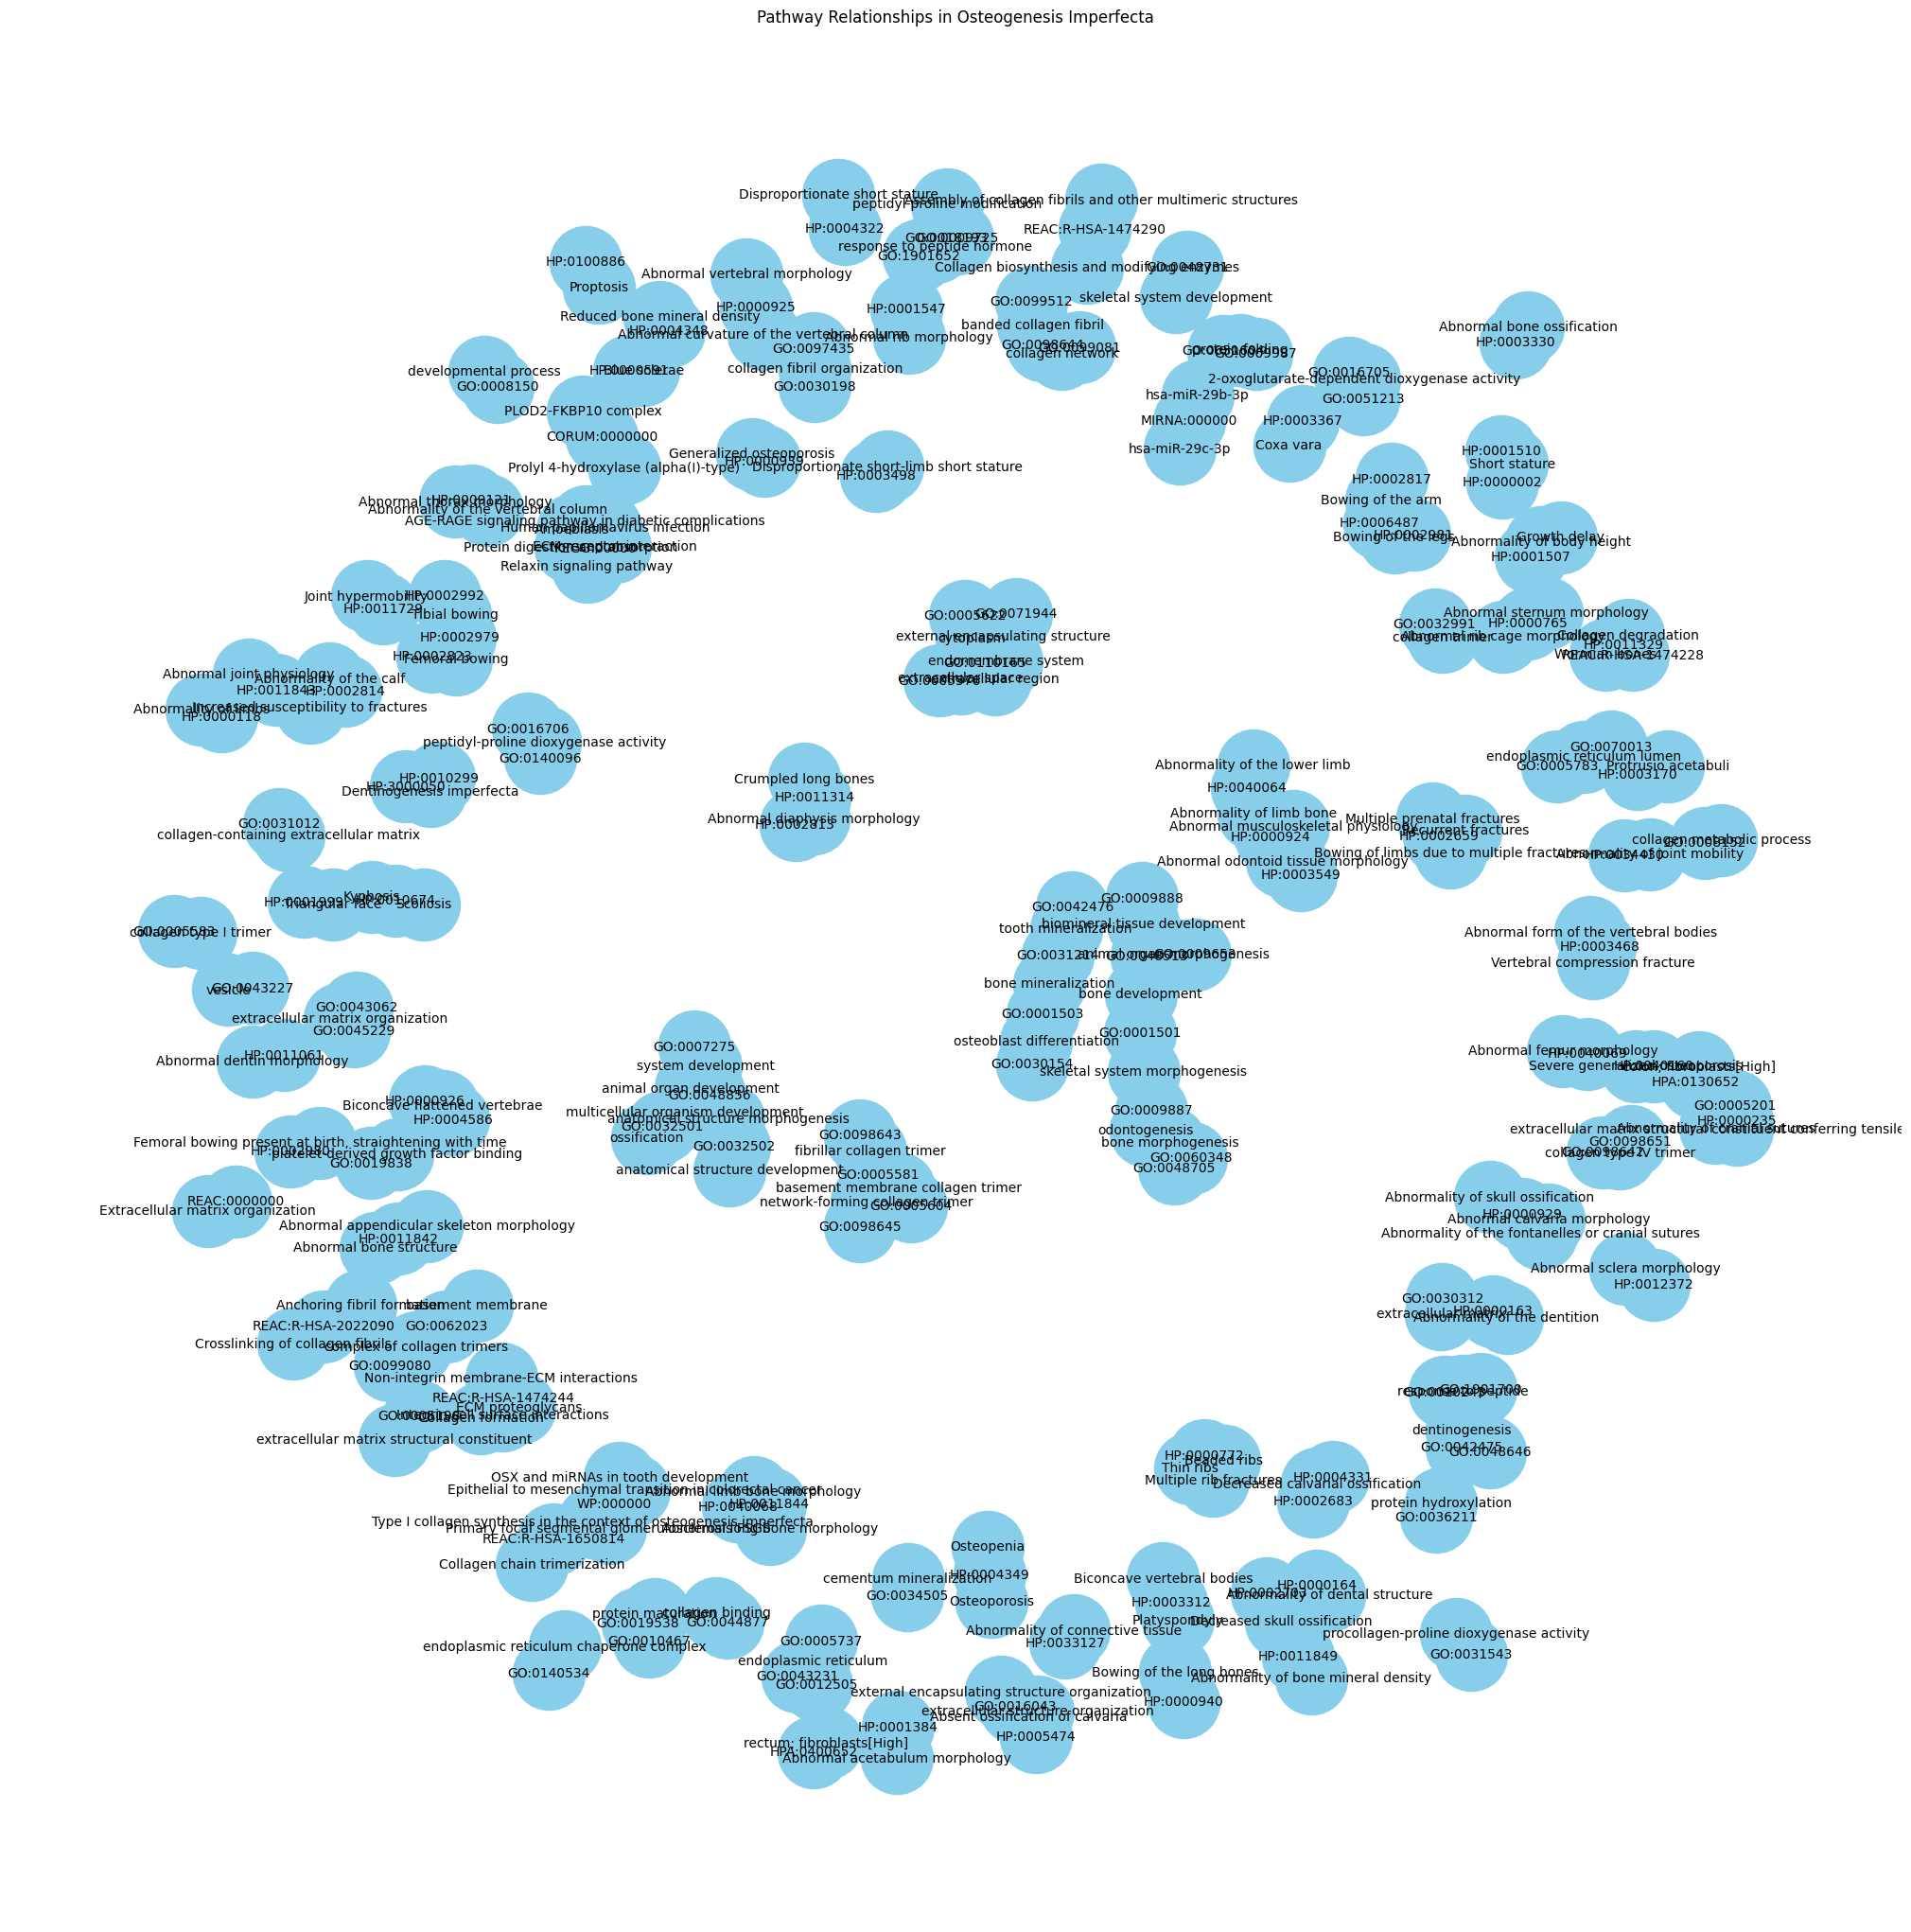

                                                  name  cluster
0    Type I collagen synthesis in the context of os...        1
1                            Dentinogenesis imperfecta        0
2                           Abnormal dentin morphology        1
3                                  Recurrent fractures        1
4                Increased susceptibility to fractures        1
..                                                 ...      ...
155  Femoral bowing present at birth, straightening...        1
156                                     dentinogenesis        1
157              peptidyl-proline dioxygenase activity        1
158                                bone mineralization        1
159               Prolyl 4-hydroxylase (alpha(I)-type)        1

[160 rows x 2 columns]


C:\Users\lenovo\.conda\envs\The_Analyst\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [12]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

# Create a NetworkX graph
G = nx.Graph()

# Add nodes (pathways) to the graph
for index, row in pathways.iterrows():
    G.add_node(row['name'])

# Add edges (relationships) between pathways
for index, row in pathways.iterrows():
    for parent in row['parents']:
        G.add_edge(row['name'], parent)

# Visualize the network graph
plt.figure(figsize=(20, 20))
nx.draw(G, with_labels=True, node_size=3000, node_color='skyblue', font_size=10)
plt.title('Pathway Relationships in Osteogenesis Imperfecta')
plt.show()

# Encode parent pathways
parent_encoder = LabelEncoder()
parent_encoder.fit(sum(pathways['parents'], []))  # Flatten the list of lists
pathways['parent_labels'] = pathways['parents'].apply(lambda x: parent_encoder.transform(x).tolist())

# Combine encoded parent labels into a single label for each pathway
pathways['combined_parent_label'] = pathways['parent_labels'].apply(lambda x: '_'.join(map(str, x)))

# Perform cluster analysis
X = pathways[['name', 'combined_parent_label']]
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
pathways['cluster'] = cluster.fit_predict(X[['combined_parent_label']])

# Display the clusters
print(pathways[['name', 'cluster']])


In [13]:
# Set the maximum number of rows to display
pd.set_option('display.max_rows', None)
ordered_pathways = pathways[['name', 'cluster']].sort_values(by='cluster', ascending=False)
ordered_pathways

,name,cluster
85,bone morphogenesis,2
0,Type I collagen synthesis in the context of os...,1
110,Generalized osteoporosis,1
102,anatomical structure development,1
103,Abnormality of body height,1
104,AGE-RAGE signaling pathway in diabetic complic...,1
105,Amoebiasis,1
107,Protein digestion and absorption,1
108,Collagen degradation,1
109,Scoliosis,1


In [14]:
from gprofiler import GProfiler

def functional_enrichment_analysis(pathways):
    gp = GProfiler(return_dataframe=True)
    enriched_terms = gp.profile(query=pathways['name'].tolist(), organism='hsapiens', sources=['WP'], user_threshold=0.5,
                                significance_threshold_method='fdr', no_evidences=False)
    return enriched_terms

# Perform functional enrichment analysis
enriched_terms = functional_enrichment_analysis(pathways)

# Display the enriched terms
print(enriched_terms[['native', 'name', 'p_value', 'source']])


Empty DataFrame
Columns: [native, name, p_value, source]
Index: []


In [15]:
from itertools import combinations

def identify_relationships(pathways):
    # Create a dictionary of pathways and their keywords from descriptions
    pathway_keywords = {}
    for _, row in pathways.iterrows():
        keywords = set(row['description'].lower().split())  # Split description into keywords
        pathway_keywords[row['name']] = keywords

    # Create edges based on shared keywords
    edges = []
    for (pathway1, keywords1), (pathway2, keywords2) in combinations(pathway_keywords.items(), 2):
        if keywords1 & keywords2:  # If there is an intersection
            edges.append((pathway1, pathway2))

    return edges

edges = identify_relationships(pathways)


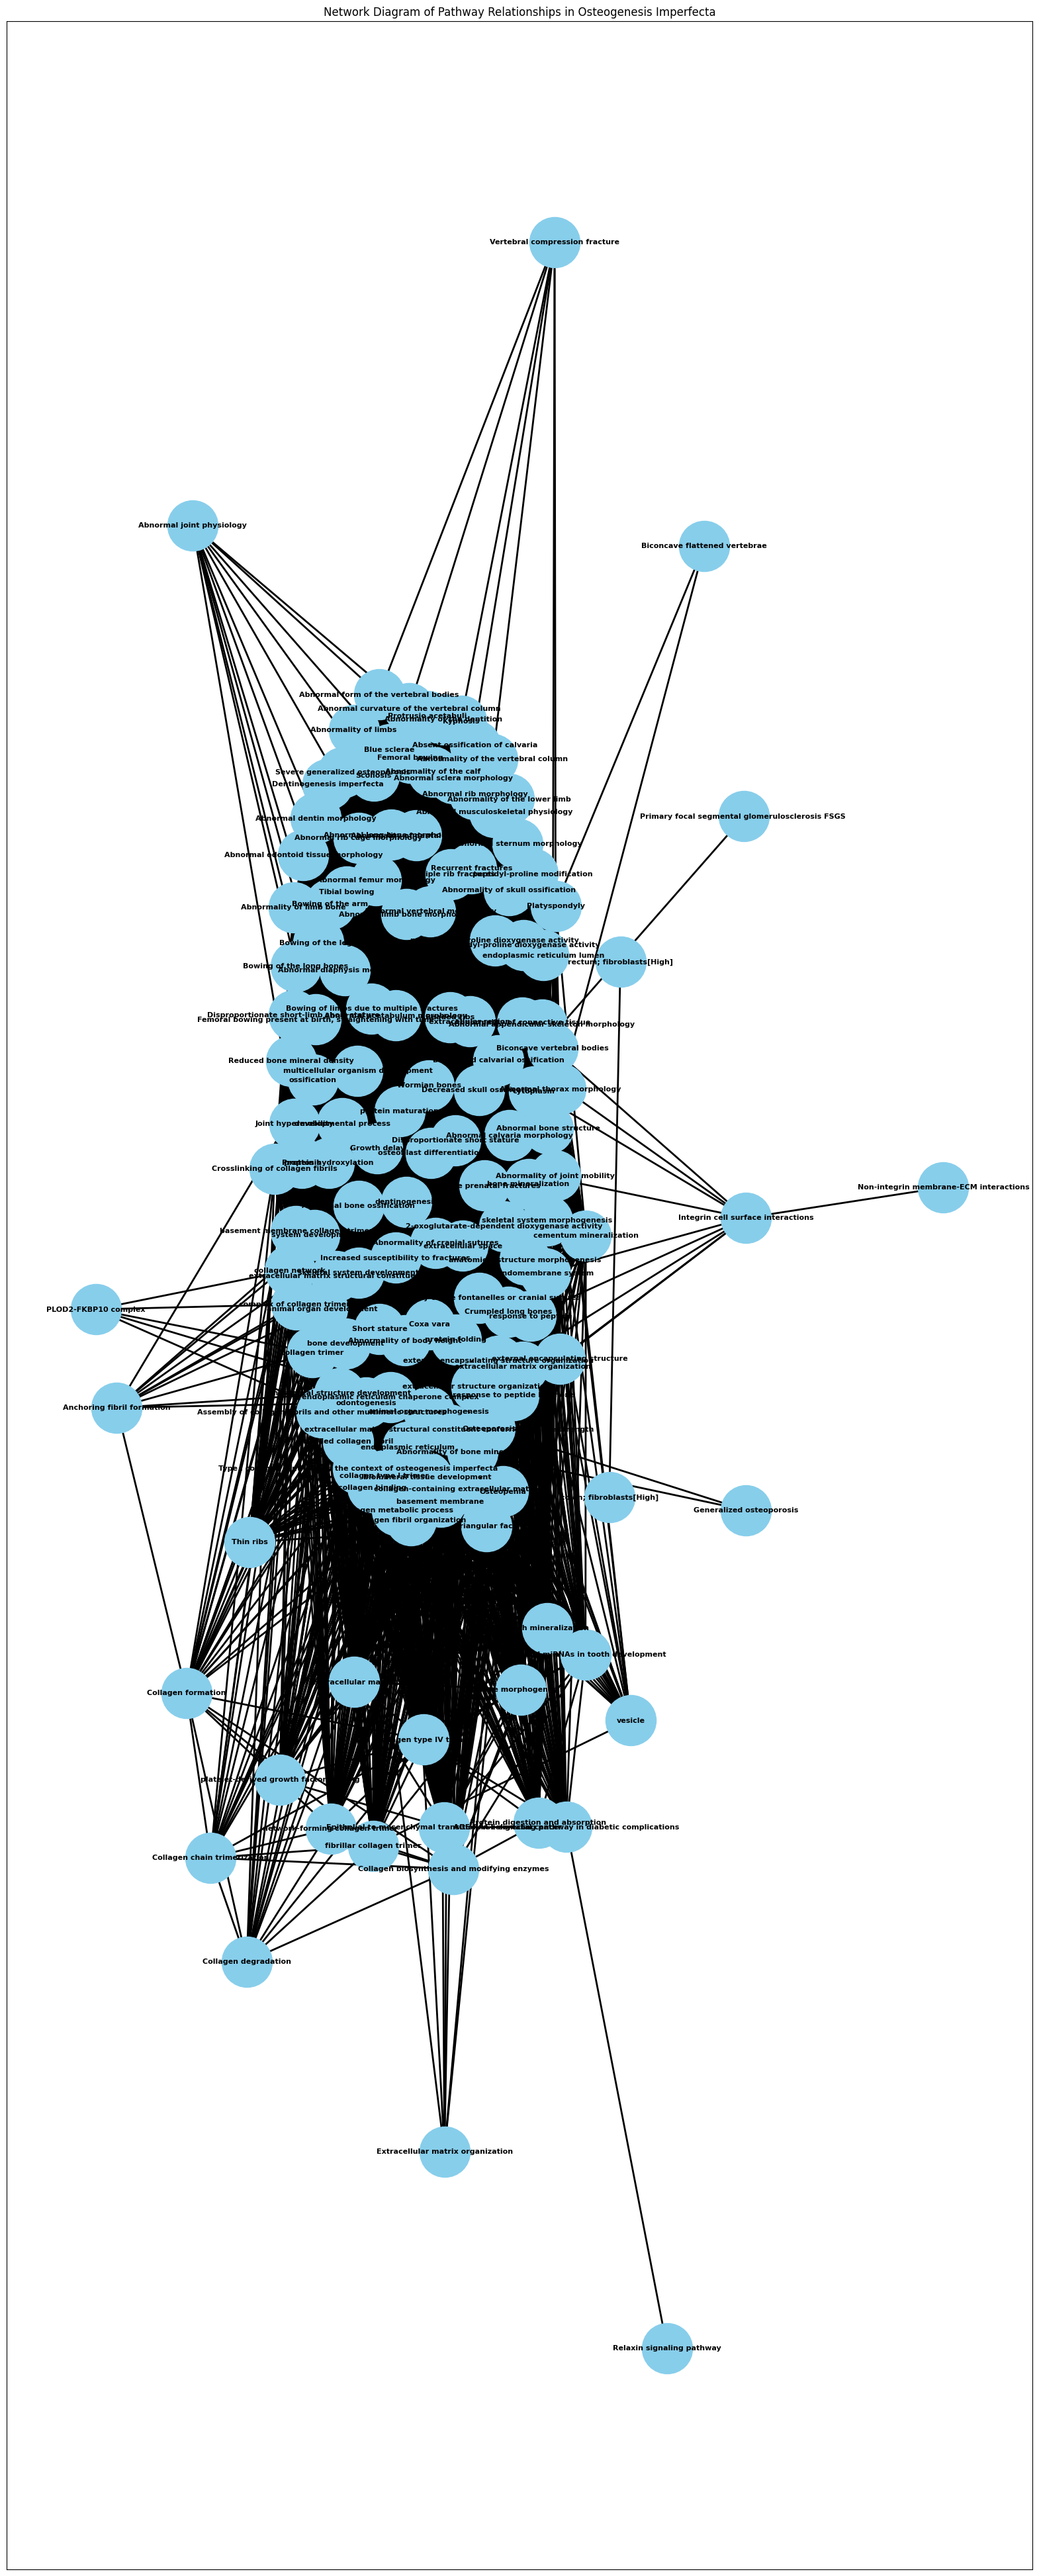

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a NetworkX graph
G = nx.Graph()
G.add_edges_from(edges)

# Create a hierarchical layout
pos = nx.kamada_kawai_layout(G, scale=5)

# Draw the network
plt.figure(figsize=(20, 50))
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold', verticalalignment='center')

plt.title('Network Diagram of Pathway Relationships in Osteogenesis Imperfecta')
plt.show()


In [22]:
def count_unique_pathways(pathways_df):
    unique_pathways = pathways_df['name'].unique()
    return len(unique_pathways)

# Example usage
num_unique_pathways = count_unique_pathways(pathways)
print("Number of unique pathways:", num_unique_pathways)


Number of unique pathways: 160
